In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
#Function to Read in Dataset using Absolute Path and Create Dataframe
def build_network_from_excel(file_path,sheet_name,**kwargs):
    df_getNetwork = pd.read_excel(file_path,sheet_name=sheet_name)
    
    k1 = []
    k2 = []
    for i in range(0,len(df_getNetwork)):
        kinasePairs = df_getNetwork.iloc[i,0]
        splitKinases = re.split(r"\.(\w\w)",kinasePairs)  
        # use ".XX" as split pattern for split kinasepaires into two columns（k1, k2）
        k1.append(splitKinases[0])
        k2.append(splitKinases[1]+splitKinases[2])  
    df_getNetwork["k1"] = k1
    df_getNetwork["k2"] = k2
    
    return build_network_from_df(df_getNetwork,**kwargs)  
    # **kwargs:can pass arbitrary keyword arguments into functions and accept arbitrary keyword arguments inside functions, frequently seen in inheritance

In [3]:
#Function to Build and Visualize Weighted Netowrks with/without Threshold for Weights, Save Networks to Files
def build_network_from_df(df,key,threshold=None,k1="k1",k2="k2",save_path="/Users/iris/Documents/QMUL-2018/Individual_Project/coding/final_networks/"):
    if threshold is not None:
        df=df[df[key]>threshold]
    output_net=nx.from_pandas_edgelist(df,k1,k2,[key])
    
    #quick view of the networks
    nx.draw_networkx(output_net, with_labels=True)         
    plt.show()
    nx.write_graphml_lxml(output_net,save_path+"net_{}.graphml".format(key))
    
    return output_net

/Users/iris/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


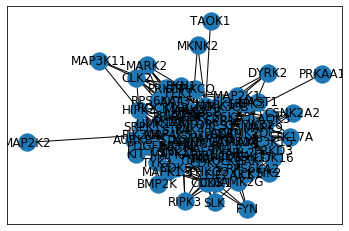

In [4]:
#test functions
df_getNetwork = build_network_from_excel(file_path = "/Users/iris/Documents/QMUL-2018/Individual_Project/coding/datasets/mcf7_ntera2_hl60_ksea.xlsm",key="MCF7", sheet_name = "zScorenodes.edges", threshold = 0.2)
cell_line = "MCF7"